In [18]:
import sys
import os
sys.path.append('/Users/zhengz11/myscripts/git_clone/pn_kc/')

import json
import mushroom_2to3.connect_path as cp
import mushroom_2to3.analysis_routine as ar


# credential, to delete when push to remote
sys.path.append('/Users/zhengz11/myscripts/mushroom_v9/credential/')
from fafb_tokens import token
fafb_c = cp.fafb_connection(token)


def save_json(js, file_name):
    with open(file_name, 'w+') as file:
        json.dump(js, file)
    file.close()

def load_json(path):
    with open(path) as outfile:
        r = json.load(outfile)
    return r

path = "/Users/zhengz11/myscripts/git_clone/pn_kc/test/"

##----------------------------------------
import mushroom_2to3.connect as cc
pn_skids = cc.get_skids_from_annos(
    fafb_c, [['right_calyx_PN'], ['has_bouton']], ["multiglomerular PN"])

# get KC skeleton ids from CATMAID
# rd is random draw manually traced KCs
rd = cc.get_skids_from_annos(fafb_c,
                             [['Random Draw 1 KC', 'Random Draw 2 KC'], ['Complete']],
                             ['KCaBp', 'KCyd'])

t1p = cc.get_skids_from_annos(fafb_c,
                             [['T1+ Complete']])


bundle = cc.get_skids_from_annos(fafb_c,
    [['Bundle 1 Seed', 'Different Tracing Protocol in Bundle 1'], ['Complete']], ['KCaBp', 'KCyd'])

save_path = path + "skids/"

if not os.path.exists(save_path):
    os.makedirs(save_path)

save_json(pn_skids, save_path + "PN")
save_json(rd, save_path + "RandomDraw")
save_json(t1p, save_path + "t1p")
save_json(bundle, save_path + "bundle")


# pn_skids = load_json(save_path + "PN")
# rd = load_json(save_path + "RandomDraw")
# bundle = load_json(save_path + "bundle")
# load_json(save_path + "t1p.txt")
# load_json(save_path + "bundle.txt")

all_skids = pn_skids + rd + t1p + bundle

for i in all_skids:
    cp.save_compact_sk(fafb_c, i, path)

cp.save_annotations_for_skeleton(fafb_c, all_skids, path)
cp.save_neurons_names(fafb_c, all_skids, path)
cp.save_root_node(fafb_c, all_skids, path)
cp.save_annotated_annotations(fafb_c, 'glom_class', 'id', path)
cp.save_annotated_annotations(fafb_c, 'kc_class', 'id', path)
cp.save_pre_post_info(fafb_c, pn_skids, rd + t1p, path, 'testing_pn_kc')


downloading skeleton 2863104
downloading skeleton 57349
downloading skeleton 57353
downloading skeleton 11544074
downloading skeleton 16
downloading skeleton 23569
downloading skeleton 57361
downloading skeleton 43539
downloading skeleton 57365
downloading skeleton 11524119
downloading skeleton 192547
downloading skeleton 57381
downloading skeleton 36390
downloading skeleton 57385
downloading skeleton 23597
downloading skeleton 24622
downloading skeleton 37935
downloading skeleton 400943
downloading skeleton 775731
downloading skeleton 67637
downloading skeleton 11544121
downloading skeleton 57402
downloading skeleton 22594
downloading skeleton 57410
downloading skeleton 57414
downloading skeleton 30791
downloading skeleton 57418
downloading skeleton 57422
downloading skeleton 68697
downloading skeleton 1775706
downloading skeleton 23134
downloading skeleton 56424
downloading skeleton 41578
downloading skeleton 27246
downloading skeleton 33903
downloading skeleton 22132
downloading ske

In [48]:
exec(open("/Users/zhengz11/myscripts/git_clone/pn_kc/connectivity/load_pn_metadata_v2.py").read())

In [61]:
save_path = '/Users/zhengz11/myscripts/data_results/191117-community_expansion/'
ana = ana_all_rd

num_exp = 1000

comm_anno_ids = df_lookup('glom_id',comm_ids,'glom_anno_id',glom_btn_table)

ana_obj = ana.conn_data['glom_kc_in_claw_unit']

all_ids = ana_obj.col_ids

comm_idx = find_elements(all_ids,comm_anno_ids)

reorder_glom = comm_idx + [i for i in range(len(all_ids)) if i not in comm_idx]

ob_comm = ana_obj.conn['1s'][:,comm_idx]
ob_claw_set = np.sum(ob_comm)

ob_conn, glom_prob, glom_idx_ids = get_conn_prob_idx(ana_obj)

ro_prob = [glom_prob[i] for i in reorder_glom]

ro_conn = ob_conn[:,reorder_glom]
ob_claw = np.sum(ro_conn[:,:10])
ob_kc = np.count_nonzero(np.sum(ro_conn[:,:10],1))

sfl_claw_set = []
sfl_kc_set = []
for i in range(num_exp):
    sfl_conn_g = shuffle_glom_kc_w_prob(ro_conn, ro_prob)[:,:10]
    sfl_claw_set.append(np.sum(sfl_conn_g))
    sfl_kc_set.append(np.count_nonzero(np.sum(sfl_conn_g,1)))



In [ ]:
plt.style.use('seaborn-deep')
fig, ax1 = plt.subplots()
clawhist = ax1.hist(sfl_claw_set)
ax1.plot(ob_claw, 4, 'ro', ms=12)
fig.set_size_inches([10,6])
# plt.savefig(save_path + '191117-num_claws_for_comm_vs_noncomm_allKCs.png')
# mean - 1412.5
# std - 34.0
# observed - 1901
# 14.3 std
# (ob_claw - np.mean(sfl_claw_set))/np.std(sfl_claw_set)

fig = plt.figure()
plt.hist(sfl_kc_set)
plt.plot(ob_kc, 4, 'ro', ms=12)
fig.set_size_inches([10,6])
# plt.savefig(save_path + '191117-num_kcs_for_comm_vs_noncomm_allKCs.png')
# mean - 903.4
# std - 17.3
# observed - 844
# 3.4 std

# 200226 re-plot the above figure with the same data


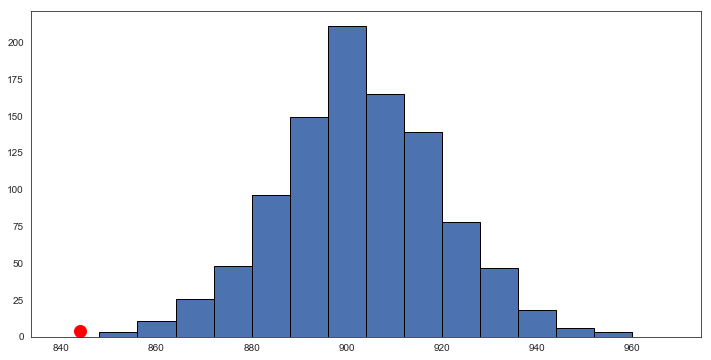

In [62]:
fig, ax = plt.subplots()
ax.hist(sfl_kc_set, bins=range(840,970,8), edgecolor='black')
ax.plot(ob_kc, 4, 'ro', ms=12)
fig.set_size_inches([12,6])
save_path = '/Users/zhengz11/myscripts/data_results/200226-rerun_comm_claw_hist/'
plt.show()
# fig.savefig(save_path + '200226-num_kcs_for_comm_vs_noncomm_allKCs_morebins.png', bbox_inches='tight', dpi=600)